In [9]:
import numpy as np
import pandas as pd
import matplotlib as pyplt
import seaborn as sns

In [10]:
df=pd.read_csv("diet_log_100.csv")
df

,Date,Meal,Food,Calories
0,2025-07-01,Breakfast,Smoothie,272
1,2025-07-01,Lunch,Salad,210
2,2025-07-01,Lunch,Paneer,526
3,2025-07-01,Snack,Nuts,543
4,2025-07-02,Lunch,Chicken Curry,330
...,...,...,...,...
95,2025-07-24,Breakfast,Toast,410
96,2025-07-25,Lunch,Pasta,236
97,2025-07-25,Snack,Chips,211
98,2025-07-25,Snack,Fruit,392


In [11]:
df.head()

,Date,Meal,Food,Calories
0,2025-07-01,Breakfast,Smoothie,272
1,2025-07-01,Lunch,Salad,210
2,2025-07-01,Lunch,Paneer,526
3,2025-07-01,Snack,Nuts,543
4,2025-07-02,Lunch,Chicken Curry,330


In [12]:
df.tail()

,Date,Meal,Food,Calories
95,2025-07-24,Breakfast,Toast,410
96,2025-07-25,Lunch,Pasta,236
97,2025-07-25,Snack,Chips,211
98,2025-07-25,Snack,Fruit,392
99,2025-07-25,Breakfast,Pancakes,353


In [13]:
df.shape

(100, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      100 non-null    object
 1   Meal      100 non-null    object
 2   Food      100 non-null    object
 3   Calories  100 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [15]:
df.describe()

,Calories
count,100.000000
mean,393.390000
std,109.417548
min,207.000000
25%,308.750000
50%,395.000000
75%,487.000000
max,593.000000


In [16]:
df.isnull()

,Date,Meal,Food,Calories
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,False,False,False
96,False,False,False,False
97,False,False,False,False
98,False,False,False,False


In [17]:
df.isnull().sum()

Date        0
Meal        0
Food        0
Calories    0
dtype: int64

In [18]:
# Convert Date column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and sum calories
daily_calories = df.groupby('Date')['Calories'].sum().reset_index()

print(daily_calories)

    


         Date  Calories
0  2025-07-01      1551
1  2025-07-02      1833
2  2025-07-03      1792
3  2025-07-04      1242
4  2025-07-05      1830
5  2025-07-06      1613
6  2025-07-07      1379
7  2025-07-08      1502
8  2025-07-09      1475
9  2025-07-10      1876
10 2025-07-11      1692
11 2025-07-12      1522
12 2025-07-13      1865
13 2025-07-14      1532
14 2025-07-15      1287
15 2025-07-16      1402
16 2025-07-17      2093
17 2025-07-18      1467
18 2025-07-19      1473
19 2025-07-20      1428
20 2025-07-21      1238
21 2025-07-22      1947
22 2025-07-23      1767
23 2025-07-24      1341
24 2025-07-25      1192


In [18]:
# Convert Date column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and sum calories
daily_calories = df.groupby('Date')['Calories'].sum().reset_index()

print(daily_calories)

    


         Date  Calories
0  2025-07-01      1551
1  2025-07-02      1833
2  2025-07-03      1792
3  2025-07-04      1242
4  2025-07-05      1830
5  2025-07-06      1613
6  2025-07-07      1379
7  2025-07-08      1502
8  2025-07-09      1475
9  2025-07-10      1876
10 2025-07-11      1692
11 2025-07-12      1522
12 2025-07-13      1865
13 2025-07-14      1532
14 2025-07-15      1287
15 2025-07-16      1402
16 2025-07-17      2093
17 2025-07-18      1467
18 2025-07-19      1473
19 2025-07-20      1428
20 2025-07-21      1238
21 2025-07-22      1947
22 2025-07-23      1767
23 2025-07-24      1341
24 2025-07-25      1192


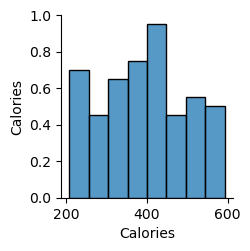

In [19]:
sns.pairplot(df)

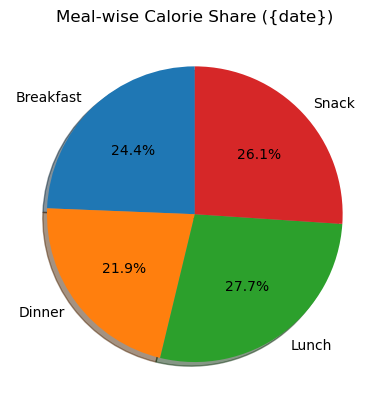

In [47]:
meal_calories = df.groupby("Meal")["Calories"].sum()

plt.pie(
    meal_calories,
    labels=meal_calories.index,
    autopct="%1.1f%%",
    startangle=90,
    shadow=True
)
plt.title("Meal-wise Calorie Share ({date})")
plt.show()


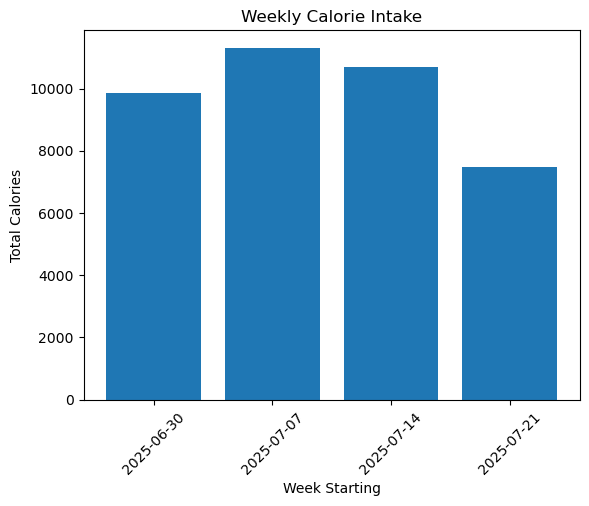

In [48]:
df["Week"] = df["Date"].dt.to_period("W").apply(lambda r: r.start_time)
weekly_calories = df.groupby("Week")["Calories"].sum()

# ---------- Plot Bar Chart ----------
plt.bar(weekly_calories.index.astype(str), weekly_calories.values)
plt.xticks(rotation=45)
plt.title("Weekly Calorie Intake")
plt.xlabel("Week Starting")
plt.ylabel("Total Calories")
plt.show()